In [1]:
from process_helper import *
import numpy as np

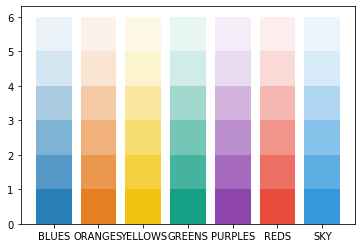

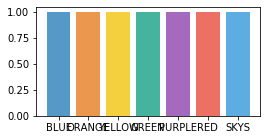

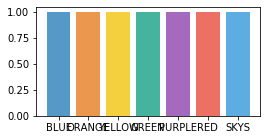

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [10]:
exp = "exp_scan_10g_fanout250_rerun"

In [11]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)

In [12]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'bufferd_idx_pgs_', 'cc_time_ms', 'commit_cnt_',
       'commit_latency_perc0_us', 'commit_latency_perc50_us',
       'commit_latency_perc99_us', 'commit_queue_sz_', 'g_buf_entry_sz',
       'g_buf_type', 'g_check_loaded', 'g_commit_group_sz', 'g_commit_pool_sz',
       'g_commit_queue_limit', 'g_cpu_freq', 'g_early_lock_release',
       'g_enable_group_commit', 'g_enable_logging',
       'g_enable_phantom_protection', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
 

In [48]:
# create pivot table
df0 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["g_total_buf_sz", ["ne", 12000000000]]
])
pivot0 = df0.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_", "remote_rd_time_ms",
    "accesses_",'remote_req_sz_perc0', 'remote_req_sz_perc100', 'remote_req_sz_perc25',
       'remote_req_sz_perc50', 'remote_req_sz_perc75'
    ].max()
pivot0

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_rds_,commit_cnt_,remote_rd_time_ms,accesses_,remote_req_sz_perc0,remote_req_sz_perc100,remote_req_sz_perc25,remote_req_sz_perc50,remote_req_sz_perc75
g_total_buf_sz,,,,,,,,,,,,,,,,,,
3000000000,529.349,0,0.840889,522388,12.2050,10764.3,3409.22,11515.8,5211,10633,63599,959783,3283162,0.0,101.0,24.0,48.0,73.0
6000000000,1298.640,0,0.924492,606726,35.2569,13389.0,2049.51,13560.4,4426,12839,156037,941976,8035264,0.0,101.0,22.0,45.0,72.0
9000000000,3329.620,0,0.975527,506345,437.6500,65166.8,2149.38,65391.9,918,11710,401001,637235,20690011,0.0,101.0,19.0,40.0,66.0


In [14]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["g_total_buf_sz", ["ne", 12000000000]]
])
pivot2 = df2.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_", "commit_cnt_", "remote_rd_time_ms",
    "idx_misses_", "idx_accesses_", "accesses_"
    ].max()
pivot2

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,g_buf_type,remote_rds_,commit_cnt_,remote_rd_time_ms,idx_misses_,idx_accesses_,accesses_
g_total_buf_sz,,,,,,,,,,,,,,,,
3000000000,600.825,0,0.955982,180045,13.7095,11232.5,5693.88,11263.0,5328,PGBUF,180045,73025,959775,3734,321971,4090230
6000000000,926.641,0,0.972959,174452,24.3160,12605.1,4004.45,12738.2,4775,PGBUF,174452,116073,987787,6679,507932,6451329
9000000000,1585.180,0,0.984595,168764,54.0058,16462.3,2959.71,16532.6,3630,PGBUF,168764,196007,937802,8164,863646,10955412


In [15]:
# create pivot table
df3 = apply_mask(df, [
    ["g_buf_type", ["eq", "NOBUF"]]
])
pivot3 = df3.groupby([
    "g_total_buf_sz", 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", "commit_cnt_",
    "num_flushes_", "g_buf_type", "remote_rds_", "remote_rd_time_ms"
    ].max()
pivot3

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),commit_cnt_,num_flushes_,g_buf_type,remote_rds_,remote_rd_time_ms
g_total_buf_sz,,,,,,,,,,,,,
3000000000,82.192,0,0.0,594265,1.53997,8001.72,12418.8,9352.08,9880,6417,NOBUF,9898,961367


[0.3, 0.6, 1.3]


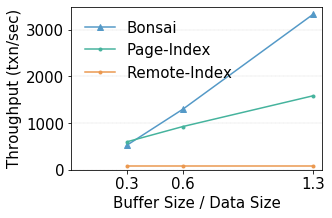

In [16]:
workload_ratio = [round(sz / 10240000000.0 * 10) / 10.0 for sz in pivot0.index]
workload_ratio[-1] = 1.3
print(workload_ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker="^", label="Bonsai")
ax.plot(workload_ratio, 
        pivot2["throughput_txn_per_sec"],
        color=line_colors["GREEN"],
        marker=".", label="Page-Index")
ax.plot(workload_ratio, 
        [pivot3["throughput_txn_per_sec"].values] * pivot0.shape[0],
        color=line_colors["ORANGE"],
        marker=".", label="Remote-Index")
# ax.set_title(plot_names[i])
plt.legend(frameon=False)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
fig.set_size_inches(4.5, 3)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)

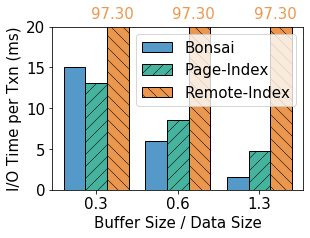

In [17]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
ax.bar(xvals, pivot0["remote_rd_time_ms"] / pivot0["commit_cnt_"],
       width=width, edgecolor="black", 
       facecolor=bar_colors["BLUE"], label="Bonsai")
ax.bar(xvals + width, pivot2["remote_rd_time_ms"] / pivot2["commit_cnt_"],
      width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index")
ax.bar(xvals + width*2, pivot3["remote_rd_time_ms"] / pivot3["commit_cnt_"],
      width=width, edgecolor="black", hatch="\\\\",
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
for x in xvals:
    y = pivot3["remote_rd_time_ms"] / pivot3["commit_cnt_"]
    ax.text(x + 0.2, 21, "%.2f" % y, color=line_colors["ORANGE"])
ax.set_ylim(0, 20)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("I/O Time per Txn (ms)")
fig.set_size_inches(4.5, 3)
plt.legend()

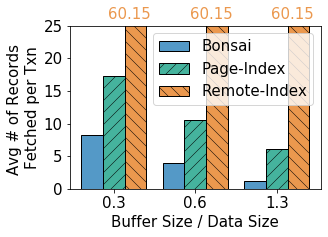

In [47]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
ax.bar(xvals, pivot0["remote_rds_"] / pivot0["commit_cnt_"] * (pivot0["misses_"] / pivot0["remote_rds_"]),
       width=width, edgecolor="black", 
       facecolor=bar_colors["BLUE"], label="Bonsai")
ax.bar(xvals + width, pivot2["remote_rds_"] / pivot2["commit_cnt_"] * (pivot2["misses_"] / pivot2["remote_rds_"]) * 7,
      width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index")
val3 = pivot3["remote_rds_"] / pivot3["commit_cnt_"] * (pivot3["misses_"] / pivot3["remote_rds_"])
ax.bar(xvals + width*2, val3,
      width=width, edgecolor="black", hatch="\\\\",
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
for x in xvals:
    y = val3
    ax.text(x + 0.2, 26, "%.2f" % y, color=line_colors["ORANGE"])
ax.set_ylim(0, 25)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Avg # of Records \nFetched per Txn")
fig.set_size_inches(4.5, 3)
plt.legend()

In [18]:
pivot0["misses_"] / pivot0["remote_rds_"]

g_total_buf_sz
3000000000    49.128938
6000000000    47.256484
9000000000    43.240393
dtype: float64

In [21]:
pivot0["misses_"] / pivot0["accesses_"]

g_total_buf_sz
3000000000    0.159111
6000000000    0.075508
9000000000    0.024473
dtype: float64

In [19]:
pivot2["misses_"] / pivot2["accesses_"]

g_total_buf_sz
3000000000    0.044018
6000000000    0.027041
9000000000    0.015405
dtype: float64

In [20]:
(pivot2["misses_"] - pivot2["idx_misses_"]) / (pivot2["accesses_"] - pivot2["idx_accesses_"])

g_total_buf_sz
3000000000    0.046788
6000000000    0.028228
9000000000    0.015914
dtype: float64

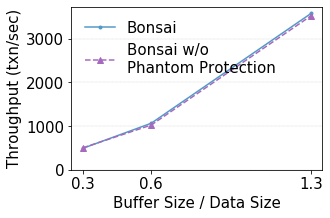

In [41]:
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker=".", label="Bonsai")
ax.plot(workload_ratio, 
        pivot1["throughput_txn_per_sec"],
        color=line_colors["PURPLE"], linestyle="--",
        marker="^", label="Bonsai w/o \nPhantom Protection")
# ax.set_title(plot_names[i])
plt.legend(frameon=False)
#ax.set_xticks([0, 1, 2, 3], ratio)
ax.set_ylim(ymin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
fig.set_size_inches(4.5, 3)

In [73]:
pivot0["throughput_txn_per_sec"]

g_total_buf_sz
3000000000      502.541
6000000000     1132.750
9000000000     3268.690
15000000000    3504.070
Name: throughput_txn_per_sec, dtype: float64

In [74]:
pivot0["remote_rd_time_ms"] / pivot0["misses_"]

g_total_buf_sz
3000000000     1.925166
6000000000     1.789981
9000000000     1.177724
15000000000         NaN
dtype: float64

In [65]:
pivot0["remote_rds_"] / pivot0["commit_cnt_"]

g_total_buf_sz
3000000000     0.167249
6000000000     0.082406
9000000000     0.029185
15000000000    0.000000
dtype: float64

In [67]:
pivot0["misses_"] / pivot0["commit_cnt_"]

g_total_buf_sz
3000000000     8.257247
6000000000     3.934465
9000000000     1.267644
15000000000    0.000000
dtype: float64

In [66]:
pivot2["remote_rds_"] / pivot0["commit_cnt_"]

g_total_buf_sz
3000000000     3.018261
6000000000     1.304684
9000000000     0.440925
15000000000    0.000005
dtype: float64

In [69]:
pivot2["misses_"] / pivot2["commit_cnt_"]

g_total_buf_sz
3000000000     2.457683
6000000000     1.504984
9000000000     0.865393
15000000000    0.000005
dtype: float64

In [71]:
(pivot2["misses_"] - pivot2["idx_misses_"]) / pivot2["commit_cnt_"]

g_total_buf_sz
3000000000     2.401332
6000000000     1.452442
9000000000     0.819587
15000000000    0.000000
dtype: float64

In [24]:
def get_data_miss_rate(df):
    return (df["misses_"] - df["idx_misses_"]) / (df["accesses_"] - df["idx_accesses_"])

In [25]:
get_data_miss_rate(pivot2)

g_total_buf_sz
3000000000    0.046788
6000000000    0.028228
9000000000    0.015914
dtype: float64

In [49]:
pivot0["misses_"] / pivot0["accesses_"] 

g_total_buf_sz
3000000000    0.159111
6000000000    0.075508
9000000000    0.024473
dtype: float64